In [1]:
from bs4 import BeautifulSoup
import requests 
import re
import pandas as pd
import numpy as np
import re
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# Functions that will be used

#### Load_csv a function that returns every one of the Dataframes from our folder which we got from crawlling

In [2]:
def load_csv():
    mainDf = pd.read_csv('Tables along the process/GTD_Data_Frame_Without_Duplicates.csv')
    firstCrawlDf = pd.read_csv('Tables along the process/lahavs_first_crawl.csv')
    secondCrawlDf = pd.read_csv('Tables along the process/lahavs_second_crawl.csv')
    thirdCrawlDf = pd.read_csv('Tables along the process/shellys_first_crawl.csv')
    fourthCrawlDf = pd.read_csv('Tables along the process/shellys_second_crawl.csv')
    lastCrawlDf = pd.read_csv('Tables along the process/last_crawl.csv')
    return mainDf,firstCrawlDf,secondCrawlDf,thirdCrawlDf,fourthCrawlDf,lastCrawlDf

#### Uses load_csv to merge all of the tables into one DataFrame

In [3]:
def unionDf():
    mainDf,firstCrawlDf,secondCrawlDf,thirdCrawlDf,fourthCrawlDf,lastCrawlDf=load_csv()
    #adding attackType
    attackTypeList=firstCrawlDf.attackTypeList.tolist()
    attackTypeList.extend(secondCrawlDf.attackTypeList.tolist())
    attackTypeList.extend(thirdCrawlDf.attackTypeList.tolist())
    attackTypeList.extend(fourthCrawlDf.attackTypeList.tolist())
    attackTypeList.extend(lastCrawlDf.attackTypeList.tolist())
    #adding successfulAttack
    successfulAttackList=firstCrawlDf.successfulAttackList.tolist()
    successfulAttackList.extend(secondCrawlDf.successfulAttackList.tolist())
    successfulAttackList.extend(thirdCrawlDf.successfulAttackList.tolist())
    successfulAttackList.extend(fourthCrawlDf.successfulAttackList.tolist())
    successfulAttackList.extend(lastCrawlDf.successfulAttackList.tolist())
    #adding hostagesList
    hostagesList=firstCrawlDf.hostagesList.tolist()
    hostagesList.extend(secondCrawlDf.hostagesList.tolist())
    hostagesList.extend(thirdCrawlDf.hostagesList.tolist())
    hostagesList.extend(fourthCrawlDf.hostagesList.tolist())
    hostagesList.extend(lastCrawlDf.hostagesList.tolist())
    #adding ransomList
    ransomList=firstCrawlDf.ransomList.tolist()
    ransomList.extend(secondCrawlDf.ransomList.tolist())
    ransomList.extend(thirdCrawlDf.ransomList.tolist())
    ransomList.extend(fourthCrawlDf.ransomList.tolist())
    ransomList.extend(lastCrawlDf.ransomList.tolist())
    #adding propertyDamageList
    propertyDamageList=firstCrawlDf.propertyDamageList.tolist()
    propertyDamageList.extend(secondCrawlDf.propertyDamageList.tolist())
    propertyDamageList.extend(thirdCrawlDf.propertyDamageList.tolist())
    propertyDamageList.extend(fourthCrawlDf.propertyDamageList.tolist())
    propertyDamageList.extend(lastCrawlDf.propertyDamageList.tolist())
    #adding suicideAttackList
    suicideAttackList=firstCrawlDf.suicideAttackList.tolist()
    suicideAttackList.extend(secondCrawlDf.suicideAttackList.tolist())
    suicideAttackList.extend(thirdCrawlDf.suicideAttackList.tolist())
    suicideAttackList.extend(fourthCrawlDf.suicideAttackList.tolist())
    suicideAttackList.extend(lastCrawlDf.suicideAttackList.tolist())
    #adding partOfMultipleIncidentList
    partOfMultipleIncidentList=firstCrawlDf.partOfMultipleIncidentList.tolist()
    partOfMultipleIncidentList.extend(secondCrawlDf.partOfMultipleIncidentList.tolist())
    partOfMultipleIncidentList.extend(thirdCrawlDf.partOfMultipleIncidentList.tolist())
    partOfMultipleIncidentList.extend(fourthCrawlDf.partOfMultipleIncidentList.tolist())
    partOfMultipleIncidentList.extend(lastCrawlDf.partOfMultipleIncidentList.tolist())
    #adding typeOfWeaponList
    typeOfWeaponList=firstCrawlDf.typeOfWeaponList.tolist()
    typeOfWeaponList.extend(secondCrawlDf.typeOfWeaponList.tolist())
    typeOfWeaponList.extend(thirdCrawlDf.typeOfWeaponList.tolist())
    typeOfWeaponList.extend(fourthCrawlDf.typeOfWeaponList.tolist())
    typeOfWeaponList.extend(lastCrawlDf.typeOfWeaponList.tolist())
    #adding subTypeOfWeaponList
    subTypeOfWeaponList=firstCrawlDf.subTypeOfWeaponList.tolist()
    subTypeOfWeaponList.extend(secondCrawlDf.subTypeOfWeaponList.tolist())
    subTypeOfWeaponList.extend(thirdCrawlDf.subTypeOfWeaponList.tolist())
    subTypeOfWeaponList.extend(fourthCrawlDf.subTypeOfWeaponList.tolist())
    subTypeOfWeaponList.extend(lastCrawlDf.subTypeOfWeaponList.tolist())
    #merge into the main df
    mainDf['attack_Type'.upper()]=attackTypeList
    mainDf['Successful_Attack'.upper()]=successfulAttackList
    mainDf['hostages'.upper()]=hostagesList
    mainDf['ransom'.upper()]=ransomList
    mainDf['property_Damage'.upper()]=propertyDamageList
    mainDf['suicide_Attack'.upper()]=suicideAttackList
    mainDf['part_Of_Multiple_Incident'.upper()]=partOfMultipleIncidentList
    mainDf['type_Of_Weapon_List'.upper()]=typeOfWeaponList
    mainDf['sub_Type_Of_Weapon'.upper()]=subTypeOfWeaponList
    
    return mainDf 

#### Change_date_format takes df and seperates the date column into two different columns of year and month
We got a lot of dates that had 00 as a day and we decided to not use this data since its not viable data.

In [4]:
def change_date_format(df):
    monthList=[]
    yearList= []

    for date in df.DATE:
        tempYear=date[0]+date[1]+date[2]+date[3]
        tempMonth=date[5]+date[6]
        monthList.append(tempMonth)
        yearList.append(tempYear)
    df=df.drop(columns="DATE")
    df['month'.upper()]=monthList
    df['year'.upper()]=yearList
    df['MONTH'] = pd.to_numeric(df['MONTH'])
    df['YEAR'] = pd.to_numeric(df['YEAR'])
    return df  

#### convert_fatalities_and_injured_to_numeric is a function that converts FATALITIES and INJURED from object type to numeric type

In [5]:
def convert_fatalities_and_injured_to_numeric(df):
    df['FATALITIES'] = pd.to_numeric(df['FATALITIES'])
    df['INJURED']=pd.to_numeric(df['INJURED'])
    return df

#### add_code_columns is a function which replaces objects for code and returns dictionaries
Each one of the dictionaries receives codes and returns a string according to the code given.
the string which returns is the original data (Not coded).

In [6]:
def add_code_columns(df):

    df['COUNTRY']=df['COUNTRY'].astype('category')
    values_country = df['COUNTRY'].tolist()
    list_country = df['COUNTRY'].cat.codes
    dict_country = dict(zip(list_country,values_country))
    df['COUNTRY'] = list_country
    
    df['CITY']=df['CITY'].astype('category')  
    values_city = df['CITY'].tolist()
    list_city = df['CITY'].cat.codes
    dict_city = dict(zip(list_city,values_city))
    df['CITY'] = list_city
    
    df['TARGET_TYPE']=df['TARGET_TYPE'].astype('category')
    values_target_type = df['TARGET_TYPE'].tolist()
    list_target_type = df['TARGET_TYPE'].cat.codes
    dict_target_type = dict(zip(list_target_type,values_target_type))
    df['TARGET_TYPE']=list_target_type
    
    df['ATTACK_TYPE']=df['ATTACK_TYPE'].astype('category')
    values_attack_type = df['ATTACK_TYPE'].tolist()
    list_attack_type = df['ATTACK_TYPE'].cat.codes
    dict_attack_type = dict(zip(list_attack_type,values_attack_type))
    df['ATTACK_TYPE']= list_attack_type
    
    df['SUCCESSFUL_ATTACK']=df['SUCCESSFUL_ATTACK'].astype('category')
    values_successful_attack = df['SUCCESSFUL_ATTACK'].tolist()
    list_successful_attack = df['SUCCESSFUL_ATTACK'].cat.codes
    dict_successful_attack = dict(zip(list_successful_attack,values_successful_attack))
    df['SUCCESSFUL_ATTACK']= list_successful_attack
    
    df['HOSTAGES']=df['HOSTAGES'].astype('category')
    values_hostages = df['HOSTAGES'].tolist()
    list_hostages = df['HOSTAGES'].cat.codes
    dict_hostages = dict(zip(list_hostages,values_hostages))
    df['HOSTAGES']=list_hostages
        
    df['RANSOM']=df['RANSOM'].astype('category')
    values_ransom = df['RANSOM'].tolist()
    list_ransom = df['RANSOM'].cat.codes
    dict_ransom = dict(zip(list_ransom,values_ransom))
    df['RANSOM']=list_ransom
    
    df['PROPERTY_DAMAGE']=df['PROPERTY_DAMAGE'].astype('category')
    values_property_damage = df['PROPERTY_DAMAGE'].tolist()
    list_property_damage = df['PROPERTY_DAMAGE'].cat.codes
    dict_property_damage = dict(zip(list_property_damage,values_property_damage))
    df['PROPERTY_DAMAGE']=list_property_damage
    
    df['SUICIDE_ATTACK']=df['SUICIDE_ATTACK'].astype('category')
    values_suicide_attack = df['SUICIDE_ATTACK'].tolist()
    list_suicide_attack = df['SUICIDE_ATTACK'].cat.codes
    dict_suicide_attack = dict(zip(list_suicide_attack,values_suicide_attack))
    df['SUICIDE_ATTACK']=list_suicide_attack
    
    df['PART_OF_MULTIPLE_INCIDENT']=df['PART_OF_MULTIPLE_INCIDENT'].astype('category')
    values_part_of_multiple_incident = df['PART_OF_MULTIPLE_INCIDENT'].tolist()
    list_part_of_multiple_incident = df['PART_OF_MULTIPLE_INCIDENT'].cat.codes
    dict_part_of_multiple_incident = dict(zip(list_part_of_multiple_incident,values_part_of_multiple_incident))
    df['PART_OF_MULTIPLE_INCIDENT']=list_part_of_multiple_incident 
    
    df['TYPE_OF_WEAPON_LIST']=df['TYPE_OF_WEAPON_LIST'].astype('category')
    values_type_of_weapon_list = df['TYPE_OF_WEAPON_LIST'].tolist()
    list_type_of_weapon_list = df['TYPE_OF_WEAPON_LIST'].cat.codes
    dict_type_of_weapon_list = dict(zip(list_type_of_weapon_list,values_type_of_weapon_list))
    df['TYPE_OF_WEAPON_LIST']=list_type_of_weapon_list
    
    df['SUB_TYPE_OF_WEAPON']=df['SUB_TYPE_OF_WEAPON'].astype('category')
    values_sub_type_of_weapon = df['SUB_TYPE_OF_WEAPON'].tolist()
    list_sub_type_of_weapon = df['SUB_TYPE_OF_WEAPON'].cat.codes
    dict_sub_type_of_weapon = dict(zip(list_sub_type_of_weapon,values_sub_type_of_weapon))
    df['SUB_TYPE_OF_WEAPON']=list_sub_type_of_weapon
       
    return df,dict_country,dict_city,dict_target_type,dict_attack_type,dict_successful_attack,dict_hostages,dict_ransom,dict_property_damage,dict_suicide_attack,dict_part_of_multiple_incident,dict_type_of_weapon_list,dict_sub_type_of_weapon

# Flow


first, we load the csv by using load_csv function

In [7]:
mainDf,firstCrawlDf,secondCrawlDf,thirdCrawlDf,fourthCrawlDf,lastCrawlDf=load_csv()
lastCrawlDf.head()

,Unnamed: 0,attackTypeList,successfulAttackList,hostagesList,ransomList,propertyDamageList,suicideAttackList,partOfMultipleIncidentList,typeOfWeaponList,subTypeOfWeaponList
0,0,Bombing/Explosion,No,No,No,Yes,No,No,Explosives,Unknown Explosive Type
1,1,Hijacking,No,Yes,No,No,No,No,Unknown,Unknown
2,2,Assassination,Yes,No,No,No,No,No,Firearms,Unknown Gun Type
3,3,Assassination,Yes,No,No,No,No,No,Firearms,Rifle/Shotgun (non-automatic)
4,4,Hostage Taking (Kidnapping),Yes,Yes,No,No,No,No,Unknown,Unknown


merging the data frames with unionDf function and saving to csv as "df_merged"

In [8]:
df=unionDf()
df=df.drop(columns="Unnamed: 0")
df.to_csv('df_merged.csv')

Checking the data

In [9]:
df

,GTD_ID,DATE,COUNTRY,CITY,PERPETRATOR_GROUP,FATALITIES,INJURED,TARGET_TYPE,ATTACK_TYPE,SUCCESSFUL_ATTACK,HOSTAGES,RANSOM,PROPERTY_DAMAGE,SUICIDE_ATTACK,PART_OF_MULTIPLE_INCIDENT,TYPE_OF_WEAPON_LIST,SUB_TYPE_OF_WEAPON
0,201912310033,2019-12-31,China,Hong Kong,Unknown,0,0,Government (General),Facility/Infrastructure Attack,Yes,No,No,Yes,No,No,Incendiary,Molotov Cocktail/Petrol Bomb
1,201912310032,2019-12-31,India,Bagiot Dora,Unknown,0,1,Private Citizens & Property,Bombing/Explosion,Yes,No,No,No,No,No,Explosives,Land Mine
2,201912310031,2019-12-31,Sudan,El Geneina,Unknown,2,0,"Government (General),Police",Armed Assault,Yes,No,No,Yes,No,No,Firearms,Unknown Gun Type
3,201912310030,2019-12-31,Sudan,El Geneina,Unknown,2,1,Police,Unknown,Yes,No,No,Yes,No,No,Unknown,Unknown
4,201912310028,2019-12-31,Iraq,Baghdad,Unknown,0,0,Private Citizens & Property,Bombing/Explosion,Yes,No,No,Yes,No,No,Explosives,Unknown Explosive Type
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201178,197001000003,1970-01-00,Japan,Fukouka,Unknown,Unknown,Unknown,Government (Diplomatic),Facility/Infrastructure Attack,Yes,No,No,Yes,No,No,Incendiary,Unknown
201179,197001000002,1970-01-00,Greece,Athens,Unknown,Unknown,Unknown,Government (Diplomatic),Bombing/Explosion,Yes,No,No,Yes,No,No,Explosives,Unknown Explosive Type
201180,197001000001,1970-01-00,Philippines,Unknown,Unknown,1,0,Journalists & Media,Assassination,Yes,No,No,No,No,No,Unknown,Unknown
201181,197000000002,1970-00-00,Mexico,Mexico city,23rd of September Communist League,0,0,Government (Diplomatic),Hostage Taking (Kidnapping),Yes,Yes,Yes,No,No,No,Unknown,Unknown


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201183 entries, 0 to 201182
Data columns (total 17 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   GTD_ID                     201183 non-null  int64 
 1   DATE                       201183 non-null  object
 2   COUNTRY                    201183 non-null  object
 3   CITY                       200757 non-null  object
 4   PERPETRATOR_GROUP          201179 non-null  object
 5   FATALITIES                 201183 non-null  object
 6   INJURED                    201183 non-null  object
 7   TARGET_TYPE                201183 non-null  object
 8   ATTACK_TYPE                201183 non-null  object
 9   SUCCESSFUL_ATTACK          201183 non-null  object
 10  HOSTAGES                   201183 non-null  object
 11  RANSOM                     201183 non-null  object
 12  PROPERTY_DAMAGE            201183 non-null  object
 13  SUICIDE_ATTACK             201183 non-null  

We saw that we had a lot of na values so we dropped them

In [11]:
df.dropna(axis=0,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200753 entries, 0 to 201182
Data columns (total 17 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   GTD_ID                     200753 non-null  int64 
 1   DATE                       200753 non-null  object
 2   COUNTRY                    200753 non-null  object
 3   CITY                       200753 non-null  object
 4   PERPETRATOR_GROUP          200753 non-null  object
 5   FATALITIES                 200753 non-null  object
 6   INJURED                    200753 non-null  object
 7   TARGET_TYPE                200753 non-null  object
 8   ATTACK_TYPE                200753 non-null  object
 9   SUCCESSFUL_ATTACK          200753 non-null  object
 10  HOSTAGES                   200753 non-null  object
 11  RANSOM                     200753 non-null  object
 12  PROPERTY_DAMAGE            200753 non-null  object
 13  SUICIDE_ATTACK             200753 non-null  

We detected that the data had a lot of Unkown values instead we replaced them with np.nan so we can drop them later on.

In [12]:
dfCopy=df.copy()
dfCopy=dfCopy.replace({'Unknown': np.nan})

After deleteing Unkown values we took a look once again at our data

In [13]:
dfCopy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200753 entries, 0 to 201182
Data columns (total 17 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   GTD_ID                     200753 non-null  int64 
 1   DATE                       200753 non-null  object
 2   COUNTRY                    200753 non-null  object
 3   CITY                       190032 non-null  object
 4   PERPETRATOR_GROUP          111980 non-null  object
 5   FATALITIES                 188803 non-null  object
 6   INJURED                    181830 non-null  object
 7   TARGET_TYPE                193953 non-null  object
 8   ATTACK_TYPE                191049 non-null  object
 9   SUCCESSFUL_ATTACK          200614 non-null  object
 10  HOSTAGES                   200122 non-null  object
 11  RANSOM                     199065 non-null  object
 12  PROPERTY_DAMAGE            174231 non-null  object
 13  SUICIDE_ATTACK             200614 non-null  

dfCheck is a copy of our last version of df.
<br>
We dropped the PREPETATOR_GROUP due to the fact that this column has a lot of nan values.
<br>
In the next step we dropped the nan values that were left in the dataframe.
<br>
and once again looked at our table data - this time we checked that we have enough of records for our study

In [14]:
dfCheck=dfCopy.copy()
dfCheck=dfCheck.drop(columns='PERPETRATOR_GROUP')
dfCheck.dropna(axis=0,inplace=True)
dfCheck.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 123692 entries, 0 to 201177
Data columns (total 16 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   GTD_ID                     123692 non-null  int64 
 1   DATE                       123692 non-null  object
 2   COUNTRY                    123692 non-null  object
 3   CITY                       123692 non-null  object
 4   FATALITIES                 123692 non-null  object
 5   INJURED                    123692 non-null  object
 6   TARGET_TYPE                123692 non-null  object
 7   ATTACK_TYPE                123692 non-null  object
 8   SUCCESSFUL_ATTACK          123692 non-null  object
 9   HOSTAGES                   123692 non-null  object
 10  RANSOM                     123692 non-null  object
 11  PROPERTY_DAMAGE            123692 non-null  object
 12  SUICIDE_ATTACK             123692 non-null  object
 13  PART_OF_MULTIPLE_INCIDENT  123692 non-null  

##### saving cleaned data frame without nan values  to csv 

In [15]:
dfCheck.to_csv('df_cleaned.csv')

We wanted to look at the dataframe once again in order to understand better what we want to do with the data

In [16]:
dfCheck

,GTD_ID,DATE,COUNTRY,CITY,FATALITIES,INJURED,TARGET_TYPE,ATTACK_TYPE,SUCCESSFUL_ATTACK,HOSTAGES,RANSOM,PROPERTY_DAMAGE,SUICIDE_ATTACK,PART_OF_MULTIPLE_INCIDENT,TYPE_OF_WEAPON_LIST,SUB_TYPE_OF_WEAPON
0,201912310033,2019-12-31,China,Hong Kong,0,0,Government (General),Facility/Infrastructure Attack,Yes,No,No,Yes,No,No,Incendiary,Molotov Cocktail/Petrol Bomb
1,201912310032,2019-12-31,India,Bagiot Dora,0,1,Private Citizens & Property,Bombing/Explosion,Yes,No,No,No,No,No,Explosives,Land Mine
2,201912310031,2019-12-31,Sudan,El Geneina,2,0,"Government (General),Police",Armed Assault,Yes,No,No,Yes,No,No,Firearms,Unknown Gun Type
4,201912310028,2019-12-31,Iraq,Baghdad,0,0,Private Citizens & Property,Bombing/Explosion,Yes,No,No,Yes,No,No,Explosives,Unknown Explosive Type
8,201912310024,2019-12-31,Philippines,Inug-ug,0,0,Private Citizens & Property,Bombing/Explosion,Yes,No,No,No,No,No,Explosives,Grenade
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201173,197001030001,1970-01-03,United States,Madison,0,0,Government (General),Facility/Infrastructure Attack,Yes,No,No,Yes,No,No,Incendiary,Gasoline or Alcohol
201174,197001020003,1970-01-02,United States,Madison,0,0,Military,Facility/Infrastructure Attack,Yes,No,No,Yes,No,No,Incendiary,Molotov Cocktail/Petrol Bomb
201175,197001020002,1970-01-02,United States,Oakland,0,0,Utilities,Bombing/Explosion,Yes,No,No,Yes,No,No,Explosives,Unknown Explosive Type
201176,197001020001,1970-01-02,Uruguay,Montevideo,0,0,Police,Assassination,No,No,No,No,No,No,Firearms,Automatic Weapon


##### First, we decided that the date format is hard to work with and has a lot of default values 
<br>
days that are set to 00 value were a probelm and could affect the results of the model and we decided to get rid of them.
<br>
The other thing that we did was to "break" the data format into 2 different columns (Just to make it easier to work with later on).
<br>
Once again we looked at our dataframe in order to check the change_date_format function 

In [17]:
df=change_date_format(dfCheck)
df

,GTD_ID,COUNTRY,CITY,FATALITIES,INJURED,TARGET_TYPE,ATTACK_TYPE,SUCCESSFUL_ATTACK,HOSTAGES,RANSOM,PROPERTY_DAMAGE,SUICIDE_ATTACK,PART_OF_MULTIPLE_INCIDENT,TYPE_OF_WEAPON_LIST,SUB_TYPE_OF_WEAPON,MONTH,YEAR
0,201912310033,China,Hong Kong,0,0,Government (General),Facility/Infrastructure Attack,Yes,No,No,Yes,No,No,Incendiary,Molotov Cocktail/Petrol Bomb,12,2019
1,201912310032,India,Bagiot Dora,0,1,Private Citizens & Property,Bombing/Explosion,Yes,No,No,No,No,No,Explosives,Land Mine,12,2019
2,201912310031,Sudan,El Geneina,2,0,"Government (General),Police",Armed Assault,Yes,No,No,Yes,No,No,Firearms,Unknown Gun Type,12,2019
4,201912310028,Iraq,Baghdad,0,0,Private Citizens & Property,Bombing/Explosion,Yes,No,No,Yes,No,No,Explosives,Unknown Explosive Type,12,2019
8,201912310024,Philippines,Inug-ug,0,0,Private Citizens & Property,Bombing/Explosion,Yes,No,No,No,No,No,Explosives,Grenade,12,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201173,197001030001,United States,Madison,0,0,Government (General),Facility/Infrastructure Attack,Yes,No,No,Yes,No,No,Incendiary,Gasoline or Alcohol,1,1970
201174,197001020003,United States,Madison,0,0,Military,Facility/Infrastructure Attack,Yes,No,No,Yes,No,No,Incendiary,Molotov Cocktail/Petrol Bomb,1,1970
201175,197001020002,United States,Oakland,0,0,Utilities,Bombing/Explosion,Yes,No,No,Yes,No,No,Explosives,Unknown Explosive Type,1,1970
201176,197001020001,Uruguay,Montevideo,0,0,Police,Assassination,No,No,No,No,No,No,Firearms,Automatic Weapon,1,1970


##### After that  we decided to change the fatalities and injured datatype
<br>
since they were defined as object type but had numeric values in them
<br>
we used a function named convert_fatalities_and_injured_to_numeric
<br> 
we decided to make a backup copy for the df
<br> 
Once again we took a look at the df after changing it

In [18]:
df = convert_fatalities_and_injured_to_numeric(df)
dfBackup = df.copy()
dfBackup

,GTD_ID,COUNTRY,CITY,FATALITIES,INJURED,TARGET_TYPE,ATTACK_TYPE,SUCCESSFUL_ATTACK,HOSTAGES,RANSOM,PROPERTY_DAMAGE,SUICIDE_ATTACK,PART_OF_MULTIPLE_INCIDENT,TYPE_OF_WEAPON_LIST,SUB_TYPE_OF_WEAPON,MONTH,YEAR
0,201912310033,China,Hong Kong,0,0,Government (General),Facility/Infrastructure Attack,Yes,No,No,Yes,No,No,Incendiary,Molotov Cocktail/Petrol Bomb,12,2019
1,201912310032,India,Bagiot Dora,0,1,Private Citizens & Property,Bombing/Explosion,Yes,No,No,No,No,No,Explosives,Land Mine,12,2019
2,201912310031,Sudan,El Geneina,2,0,"Government (General),Police",Armed Assault,Yes,No,No,Yes,No,No,Firearms,Unknown Gun Type,12,2019
4,201912310028,Iraq,Baghdad,0,0,Private Citizens & Property,Bombing/Explosion,Yes,No,No,Yes,No,No,Explosives,Unknown Explosive Type,12,2019
8,201912310024,Philippines,Inug-ug,0,0,Private Citizens & Property,Bombing/Explosion,Yes,No,No,No,No,No,Explosives,Grenade,12,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201173,197001030001,United States,Madison,0,0,Government (General),Facility/Infrastructure Attack,Yes,No,No,Yes,No,No,Incendiary,Gasoline or Alcohol,1,1970
201174,197001020003,United States,Madison,0,0,Military,Facility/Infrastructure Attack,Yes,No,No,Yes,No,No,Incendiary,Molotov Cocktail/Petrol Bomb,1,1970
201175,197001020002,United States,Oakland,0,0,Utilities,Bombing/Explosion,Yes,No,No,Yes,No,No,Explosives,Unknown Explosive Type,1,1970
201176,197001020001,Uruguay,Montevideo,0,0,Police,Assassination,No,No,No,No,No,No,Firearms,Automatic Weapon,1,1970


##### We needed to change all of our categorial columns
<br>
first, they were defined as objects and we needed to convert them to categorial we gave them codes according to value with usage of a built in function. 
<br> 
Later on we returned the changed dataframe and every one of our dictionaries which contains key = code, value = original data (before conversion to code)  

In [19]:
df,dict_country,dict_city,dict_target_type,dict_attack_type,dict_successful_attack,dict_hostages,dict_ransom,dict_property_damage,dict_suicide_attack,dict_part_of_multiple_incident,dict_type_of_weapon_list,dict_sub_type_of_weapon = add_code_columns(df)

Checking our dataframe to see if add_code_columns function worked properly

In [20]:
df

,GTD_ID,COUNTRY,CITY,FATALITIES,INJURED,TARGET_TYPE,ATTACK_TYPE,SUCCESSFUL_ATTACK,HOSTAGES,RANSOM,PROPERTY_DAMAGE,SUICIDE_ATTACK,PART_OF_MULTIPLE_INCIDENT,TYPE_OF_WEAPON_LIST,SUB_TYPE_OF_WEAPON,MONTH,YEAR
0,201912310033,32,11429,0,0,143,3,1,0,0,1,0,0,3,12,12,2019
1,201912310032,76,2512,0,1,379,2,1,0,0,0,0,0,1,10,12,2019
2,201912310031,166,8676,2,0,182,0,1,0,0,1,0,0,2,27,12,2019
4,201912310028,80,2501,0,0,379,2,1,0,0,1,0,0,1,26,12,2019
8,201912310024,136,11964,0,0,379,2,1,0,0,0,0,0,1,6,12,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201173,197001030001,185,16952,0,0,143,3,1,0,0,1,0,0,3,5,1,1970
201174,197001020003,185,16952,0,0,234,3,1,0,0,1,0,0,3,12,1,1970
201175,197001020002,185,20601,0,0,545,2,1,0,0,1,0,0,1,26,1,1970
201176,197001020001,186,18909,0,0,317,1,0,0,0,0,0,0,2,1,1,1970


In [21]:
dict_city.get(5313)

'Cairo'

Saving the dataframe to df_coded_categorial csv file

In [22]:
df.to_csv('df_coded_categorial.csv')

In [23]:
df = pd.read_csv('df_coded_categorial.csv')

## Additional Data cleaning

First, we want to describe the FATALITIES
<br>
Later on we will take the maximum value and look at its row.

In [24]:
df.FATALITIES.describe()

count    123692.000000
mean          2.099812
std          10.247895
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max        1385.000000
Name: FATALITIES, dtype: float64

In [25]:
max = 1385
df[df["FATALITIES"] == 1385]

,Unnamed: 0,GTD_ID,COUNTRY,CITY,FATALITIES,INJURED,TARGET_TYPE,ATTACK_TYPE,SUCCESSFUL_ATTACK,HOSTAGES,RANSOM,PROPERTY_DAMAGE,SUICIDE_ATTACK,PART_OF_MULTIPLE_INCIDENT,TYPE_OF_WEAPON_LIST,SUB_TYPE_OF_WEAPON,MONTH,YEAR
76047,128048,200109110005,185,20148,1385,10878,382,0,1,1,0,1,1,1,3,5,9,2001
76048,128049,200109110004,185,20148,1385,10878,382,0,1,1,0,1,1,1,3,5,9,2001


As we can see there is a "duplicated" row. 
<br>
The reason for that is because GTD (our data source) decided that each one of the planes that were involved in 9/11 will get a single row (we checked online if there is additional information that is different between the GTD_ID's). 
<br> 
We don't want to work with "duplicated" rows so we will drop them by:
<br>
1.drop the GTD_ID column (save as list just in case we need it along the road)
<br>
2.drop duplicates according to our columns

In [26]:
df_without_gtd_id = df.drop(["GTD_ID","Unnamed: 0"],axis=1)
gtd_id_list = df.GTD_ID 

In [27]:
df_without_gtd_id

,COUNTRY,CITY,FATALITIES,INJURED,TARGET_TYPE,ATTACK_TYPE,SUCCESSFUL_ATTACK,HOSTAGES,RANSOM,PROPERTY_DAMAGE,SUICIDE_ATTACK,PART_OF_MULTIPLE_INCIDENT,TYPE_OF_WEAPON_LIST,SUB_TYPE_OF_WEAPON,MONTH,YEAR
0,32,11429,0,0,143,3,1,0,0,1,0,0,3,12,12,2019
1,76,2512,0,1,379,2,1,0,0,0,0,0,1,10,12,2019
2,166,8676,2,0,182,0,1,0,0,1,0,0,2,27,12,2019
3,80,2501,0,0,379,2,1,0,0,1,0,0,1,26,12,2019
4,136,11964,0,0,379,2,1,0,0,0,0,0,1,6,12,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123687,185,16952,0,0,143,3,1,0,0,1,0,0,3,5,1,1970
123688,185,16952,0,0,234,3,1,0,0,1,0,0,3,12,1,1970
123689,185,20601,0,0,545,2,1,0,0,1,0,0,1,26,1,1970
123690,186,18909,0,0,317,1,0,0,0,0,0,0,2,1,1,1970


In [28]:
df_without_dup = df_without_gtd_id.drop_duplicates()
df_without_dup
df_without_dup.to_csv('df_to_model.csv')

In [29]:
df_without_dup[df_without_dup['INJURED']>=10000]

,COUNTRY,CITY,FATALITIES,INJURED,TARGET_TYPE,ATTACK_TYPE,SUCCESSFUL_ATTACK,HOSTAGES,RANSOM,PROPERTY_DAMAGE,SUICIDE_ATTACK,PART_OF_MULTIPLE_INCIDENT,TYPE_OF_WEAPON_LIST,SUB_TYPE_OF_WEAPON,MONTH,YEAR
76047,185,20148,1385,10878,382,0,1,1,0,1,1,1,3,5,9,2001


##### We want to check outliers for FATALITIES and INJURED
the reason for those columns is because those are the only numeric values.
<br>
The rest of the columns are categorical(which were converted to numeric) - so there is no reason to check outliers in those columns. 

In [30]:
df_without_dup.FATALITIES.describe()

count    114056.000000
mean          2.228274
std           9.818259
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max        1385.000000
Name: FATALITIES, dtype: float64

In [31]:
df_without_dup[df_without_dup["FATALITIES"] >= 1000]

,COUNTRY,CITY,FATALITIES,INJURED,TARGET_TYPE,ATTACK_TYPE,SUCCESSFUL_ATTACK,HOSTAGES,RANSOM,PROPERTY_DAMAGE,SUICIDE_ATTACK,PART_OF_MULTIPLE_INCIDENT,TYPE_OF_WEAPON_LIST,SUB_TYPE_OF_WEAPON,MONTH,YEAR
76047,185,20148,1385,10878,382,0,1,1,0,1,1,1,3,5,9,2001
86681,144,10093,1180,0,379,0,1,0,0,1,0,0,2,1,4,1994


As we can see the 9/11 attack still appears (only once) due to data cleaning.
<br>
The question that we need to ask ourselves is: "Is 1385 fatalities is an outlier?"
<br>
The answer to this question will be NO - the reason is because 9/11 attack has happend and therefore we should treat it just like any other data.

In [32]:
df_without_dup[df_without_dup["FATALITIES"] == 0]

,COUNTRY,CITY,FATALITIES,INJURED,TARGET_TYPE,ATTACK_TYPE,SUCCESSFUL_ATTACK,HOSTAGES,RANSOM,PROPERTY_DAMAGE,SUICIDE_ATTACK,PART_OF_MULTIPLE_INCIDENT,TYPE_OF_WEAPON_LIST,SUB_TYPE_OF_WEAPON,MONTH,YEAR
0,32,11429,0,0,143,3,1,0,0,1,0,0,3,12,12,2019
1,76,2512,0,1,379,2,1,0,0,0,0,0,1,10,12,2019
3,80,2501,0,0,379,2,1,0,0,1,0,0,1,26,12,2019
4,136,11964,0,0,379,2,1,0,0,0,0,0,1,6,12,2019
7,76,19277,0,1,379,3,1,0,0,1,0,0,4,28,12,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123687,185,16952,0,0,143,3,1,0,0,1,0,0,3,5,1,1970
123688,185,16952,0,0,234,3,1,0,0,1,0,0,3,12,1,1970
123689,185,20601,0,0,545,2,1,0,0,1,0,0,1,26,1,1970
123690,186,18909,0,0,317,1,0,0,0,0,0,0,2,1,1,1970


As we can see, the min value FATALITIES is zero.
<br>
We can see it from pd.describe function that was mentioned before.
<br>
The result is that there is no problem with the minimum value (terror attack can have no FATALITIES (thank god))

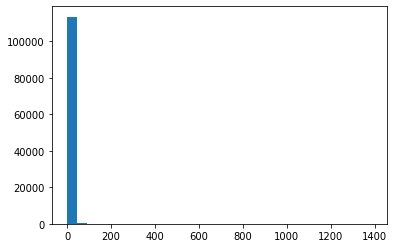

In [33]:
plt.hist(df_without_dup.FATALITIES,bins=30)
plt.xlabel=("FATALITIES")
plt.ylabel=("Frequency")

As we can see, there is not a lot of FATALITIES when its value is higher 100

##### Next, lets check INJURED column

In [34]:
df_without_dup.INJURED.describe()

count    114056.00000
mean          3.43241
std          37.77107
min           0.00000
25%           0.00000
50%           0.00000
75%           2.00000
max       10878.00000
Name: INJURED, dtype: float64

In [35]:
df_without_dup[df_without_dup["INJURED"] >= 10000]

,COUNTRY,CITY,FATALITIES,INJURED,TARGET_TYPE,ATTACK_TYPE,SUCCESSFUL_ATTACK,HOSTAGES,RANSOM,PROPERTY_DAMAGE,SUICIDE_ATTACK,PART_OF_MULTIPLE_INCIDENT,TYPE_OF_WEAPON_LIST,SUB_TYPE_OF_WEAPON,MONTH,YEAR
76047,185,20148,1385,10878,382,0,1,1,0,1,1,1,3,5,9,2001


As mentioned above, once again we got the 9/11 terror attack and we decided earlier that the data of this attack is viable to us.
(76047 is the 9/11 line in our df)

In [36]:
df_without_dup[df_without_dup["INJURED"] == 0]

,COUNTRY,CITY,FATALITIES,INJURED,TARGET_TYPE,ATTACK_TYPE,SUCCESSFUL_ATTACK,HOSTAGES,RANSOM,PROPERTY_DAMAGE,SUICIDE_ATTACK,PART_OF_MULTIPLE_INCIDENT,TYPE_OF_WEAPON_LIST,SUB_TYPE_OF_WEAPON,MONTH,YEAR
0,32,11429,0,0,143,3,1,0,0,1,0,0,3,12,12,2019
2,166,8676,2,0,182,0,1,0,0,1,0,0,2,27,12,2019
3,80,2501,0,0,379,2,1,0,0,1,0,0,1,26,12,2019
4,136,11964,0,0,379,2,1,0,0,0,0,0,1,6,12,2019
6,136,22246,1,0,143,1,1,0,0,0,0,0,2,7,12,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123687,185,16952,0,0,143,3,1,0,0,1,0,0,3,5,1,1970
123688,185,16952,0,0,234,3,1,0,0,1,0,0,3,12,1,1970
123689,185,20601,0,0,545,2,1,0,0,1,0,0,1,26,1,1970
123690,186,18909,0,0,317,1,0,0,0,0,0,0,2,1,1,1970


As we can see, the min value for INJURED is zero.
<br>
We can see it from pd.describe function that was mentioned before.
<br>
The result is that there is no problem with the minimum value (terror attack can have no INJURED (thank god))

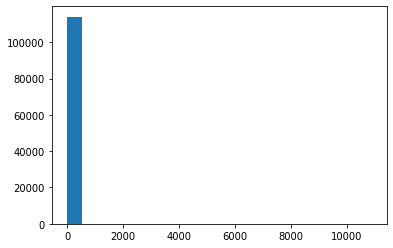

In [37]:
plt.hist(df_without_dup.INJURED,bins=20)
plt.xlabel=("INJURED")
plt.ylabel=("Frequency")

As we can see, there is not a lot of INJURED when its value is higher 500

### Heat map visualization

<AxesSubplot:>

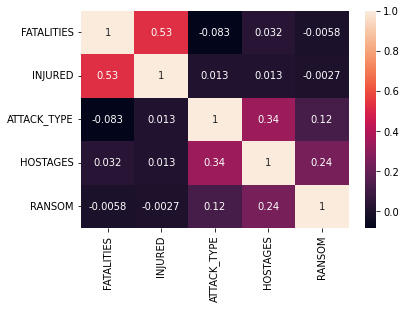

In [38]:
df_for_heat = pd.DataFrame(df_without_dup, columns = ['FATALITIES', 'INJURED', 'ATTACK_TYPE', 'HOSTAGES', 'RANSOM'])
sns.heatmap(df_for_heat.corr(), annot=True)

<AxesSubplot:>

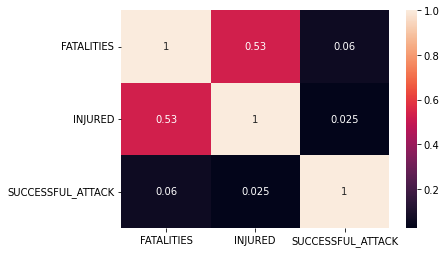

In [39]:
df_for_heat = pd.DataFrame(df_without_dup, columns = ['FATALITIES', 'INJURED', 'SUCCESSFUL_ATTACK'])
sns.heatmap(df_for_heat.corr(), annot=True)

<AxesSubplot:>

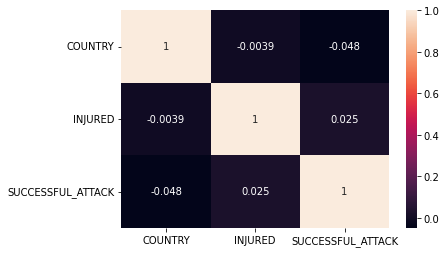

In [40]:
df_for_heat = pd.DataFrame(df_without_dup, columns = ['COUNTRY', 'INJURED', 'SUCCESSFUL_ATTACK'])
sns.heatmap(df_for_heat.corr(), annot=True)

<AxesSubplot:>

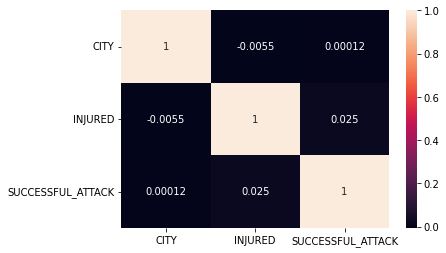

In [41]:
df_for_heat = pd.DataFrame(df_without_dup, columns = ['CITY', 'INJURED', 'SUCCESSFUL_ATTACK'])
sns.heatmap(df_for_heat.corr(), annot=True)

In [42]:
def get_highly_correlated_cols(df):
    correlations = []
    tuple_arr = []
    cor = df.corr()
    
    for i in range(len(cor)):
        for j in range(i):
            if(cor.iloc[i,j]>0.6 or cor.iloc[i,j]<-0.6):
                tuple_arr.append((i,j))  
                correlations.append(cor.iloc[i,j])
    return correlations, tuple_arr, cor


In [43]:
def plot_high_correlated_scatters(df):
    correlations, tuple_arr, cor = get_highly_correlated_cols(df)
    fig, axes = plt.subplots(1, 3, figsize=(15,5))
    for i in range(len(correlations)):
        axes[i].scatter(df[df.columns[tuple_arr[i][1]]], df[df.columns[tuple_arr[i][0]]])
        axes[i].title.set_text("corr('%s', '%s')=%4.2f" % (df.columns[tuple_arr[i][1]], df.columns[tuple_arr[i][0]], correlations[i]))

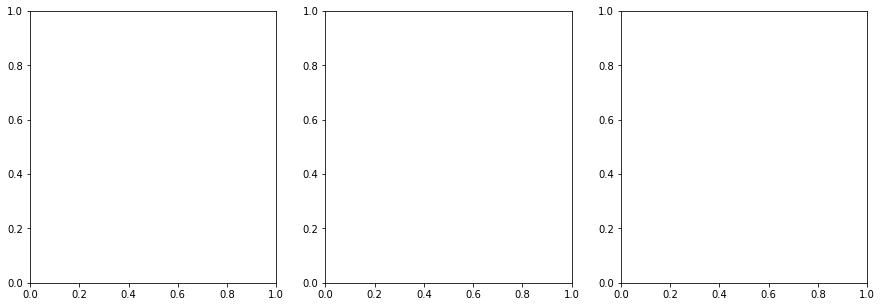

In [44]:
plot_high_correlated_scatters(df_without_dup)

We created a function named: plot_high_correlated_scatters that uses get_highly_correlated_cols in order to observe the highly correlated columns

#### correlations
= python list, containing the correlation values for highly correlated columns from the given 'df' dataframe.
<br>
#### tuple_arr
= python list, containing two dimensional tuples, representing two columns with a high correlation
<br>
#### cor
= the entire correlation matrix

In [45]:
correlations, tuple_arr, cor = get_highly_correlated_cols(df_without_dup)

In [46]:
correlations

[]

In [47]:
tuple_arr

[]

In [48]:
cor

,COUNTRY,CITY,FATALITIES,INJURED,TARGET_TYPE,ATTACK_TYPE,SUCCESSFUL_ATTACK,HOSTAGES,RANSOM,PROPERTY_DAMAGE,SUICIDE_ATTACK,PART_OF_MULTIPLE_INCIDENT,TYPE_OF_WEAPON_LIST,SUB_TYPE_OF_WEAPON,MONTH,YEAR
COUNTRY,1.000000,0.013090,-0.026862,-0.003913,-0.036643,-0.013991,-0.048454,-0.024802,0.002156,0.006033,-0.059198,0.013004,0.048848,-0.056256,-0.019079,-0.070467
CITY,0.013090,1.000000,-0.006409,-0.005482,-0.012648,-0.018509,0.000122,0.016130,0.004172,0.002960,-0.008466,-0.006228,0.026628,-0.039719,0.000414,-0.039612
FATALITIES,-0.026862,-0.006409,1.000000,0.528295,0.039044,-0.083430,0.060365,0.032061,-0.005776,0.047538,0.172461,0.012605,0.018038,-0.022129,0.003850,-0.013079
INJURED,-0.003913,-0.005482,0.528295,1.000000,0.014308,0.013066,0.025366,0.013177,-0.002656,0.039610,0.108677,0.023208,-0.036204,0.024538,0.003887,0.007676
TARGET_TYPE,-0.036643,-0.012648,0.039044,0.014308,1.000000,-0.049747,0.042364,-0.013299,-0.028789,-0.041442,0.005312,0.038524,-0.001989,0.028567,0.003106,0.129634
ATTACK_TYPE,-0.013991,-0.018509,-0.083430,0.013066,-0.049747,1.000000,0.008401,0.335914,0.115899,0.164233,0.056023,0.064871,-0.206790,0.061932,-0.000813,0.046988
SUCCESSFUL_ATTACK,-0.048454,0.000122,0.060365,0.025366,0.042364,0.008401,1.000000,0.054060,0.012377,0.243881,-0.024873,0.018024,0.056869,-0.051502,0.006047,-0.023190
HOSTAGES,-0.024802,0.016130,0.032061,0.013177,-0.013299,0.335914,0.054060,1.000000,0.243070,-0.081811,-0.014477,-0.009025,0.152017,0.010830,0.000923,0.058995
RANSOM,0.002156,0.004172,-0.005776,-0.002656,-0.028789,0.115899,0.012377,0.243070,1.000000,-0.038170,-0.008190,-0.009479,0.026702,-0.010444,-0.000379,-0.021908
PROPERTY_DAMAGE,0.006033,0.002960,0.047538,0.039610,-0.041442,0.164233,0.243881,-0.081811,-0.038170,1.000000,0.014239,0.044969,-0.188107,-0.079766,0.007517,-0.197973


#### As we can see from cor matrix there is not a single value which correlated higher then 0.6 or lower then -0.6
This means that our columns are not correlated.


In [83]:
def one_dim_plot(sr, plot_type, axis):
    if(plot_type == 'bar'):
        axis.bar(sr,sr)
    elif (plot_type == 'pie'):
        axis.pie(sr)
    else:
        axis.plot(sr)   

In [92]:
n = 10
country_code = df['COUNTRY'].value_counts()[:n].index.tolist()

['Iraq', 'Pakistan', 'India', 'Afghanistan', 'Philippines', 'Colombia', 'Peru', 'Turkey', 'Thailand', 'El Salvador']


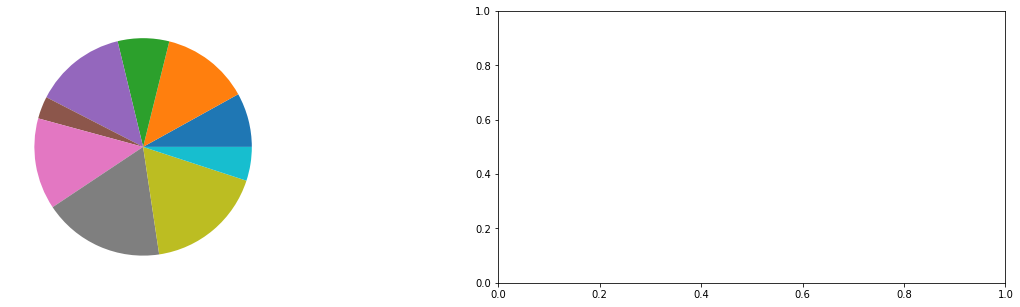

In [138]:
fig, axes = plt.subplots(1,2, figsize=(20,5))
one_dim_plot(country_sr, 'pie', axes[0])
country_name = []
for x in country_code:
    country_name.append(dict_country.get(x))
print(country_name)

### Looking at the injured data distribution

In [103]:
df_check_injured = df.INJURED
df_check_injured

0         0
1         1
2         0
3         0
4         0
         ..
123687    0
123688    0
123689    0
123690    0
123691    0
Name: INJURED, Length: 123692, dtype: int64

In [104]:
df

,Unnamed: 0,GTD_ID,COUNTRY,CITY,FATALITIES,INJURED,TARGET_TYPE,ATTACK_TYPE,SUCCESSFUL_ATTACK,HOSTAGES,RANSOM,PROPERTY_DAMAGE,SUICIDE_ATTACK,PART_OF_MULTIPLE_INCIDENT,TYPE_OF_WEAPON_LIST,SUB_TYPE_OF_WEAPON,MONTH,YEAR
0,0,201912310033,32,11429,0,0,143,3,1,0,0,1,0,0,3,12,12,2019
1,1,201912310032,76,2512,0,1,379,2,1,0,0,0,0,0,1,10,12,2019
2,2,201912310031,166,8676,2,0,182,0,1,0,0,1,0,0,2,27,12,2019
3,4,201912310028,80,2501,0,0,379,2,1,0,0,1,0,0,1,26,12,2019
4,8,201912310024,136,11964,0,0,379,2,1,0,0,0,0,0,1,6,12,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123687,201173,197001030001,185,16952,0,0,143,3,1,0,0,1,0,0,3,5,1,1970
123688,201174,197001020003,185,16952,0,0,234,3,1,0,0,1,0,0,3,12,1,1970
123689,201175,197001020002,185,20601,0,0,545,2,1,0,0,1,0,0,1,26,1,1970
123690,201176,197001020001,186,18909,0,0,317,1,0,0,0,0,0,0,2,1,1,1970


In [105]:
injured_list=list(df_check_injured)

In [106]:
injured_list.sort()

In [107]:
list_a=[]
list_b=[]
list_c=[]
list_d=[]
list_e=[]
list_f=[]
list_g=[]
list_h=[]
for x in injured_list:
    if x<=15:
        list_a.append(x)
    elif x<=30:
        list_b.append(x)
    elif x<=50:
        list_c.append(x)
    elif x<=80:
        list_d.append(x)
    elif x<=120:
        list_e.append(x)
    elif x<=200:
        list_f.append(x)
    elif x<=300:
        list_g.append(x)
    elif x<=20000:
        list_h.append(x)
    

In [108]:
series_a= pd.DataFrame(list_a)
series_b= pd.DataFrame(list_b)
series_c= pd.DataFrame(list_c)
series_d= pd.DataFrame(list_d)
series_e= pd.DataFrame(list_e)
series_f= pd.DataFrame(list_f)
series_g= pd.DataFrame(list_g)
series_h= pd.DataFrame(list_h)

In [109]:
series_a

,0
0,0
1,0
2,0
3,0
4,0
...,...
118636,15
118637,15
118638,15
118639,15


Text(0.5, 1.0, 'INJURED')

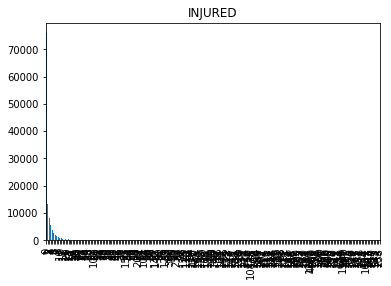

In [110]:
df_check_injured.value_counts().plot(kind='bar')
plt.title('INJURED')

Text(0.5, 1.0, 'INJURED')

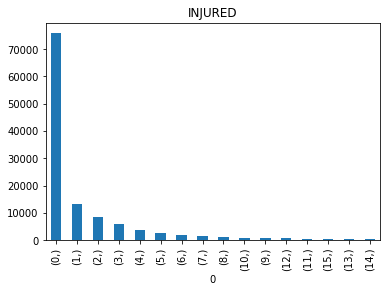

In [111]:
series_a.value_counts().plot(kind='bar')
plt.title('INJURED')

Text(0.5, 1.0, 'INJURED')

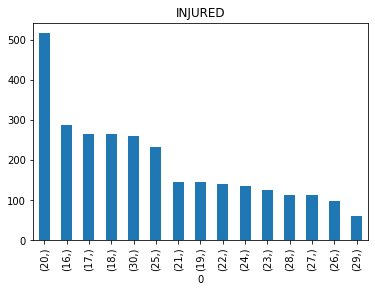

In [112]:
series_b.value_counts().plot(kind='bar')
plt.title('INJURED')

Text(0.5, 1.0, 'INJURED')

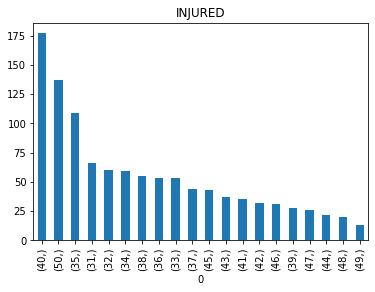

In [113]:
series_c.value_counts().plot(kind='bar')
plt.title('INJURED')

Text(0.5, 1.0, 'INJURED')

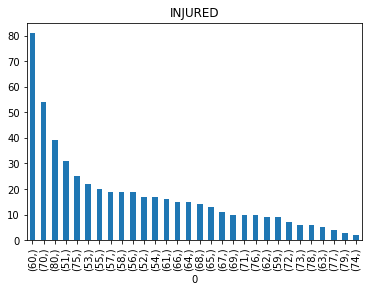

In [114]:
series_d.value_counts().plot(kind='bar')
plt.title('INJURED')

Text(0.5, 1.0, 'INJURED')

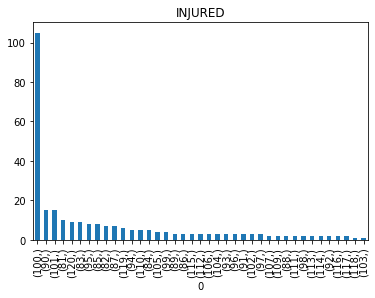

In [115]:
series_e.value_counts().plot(kind='bar')
plt.title('INJURED')

Text(0.5, 1.0, 'INJURED')

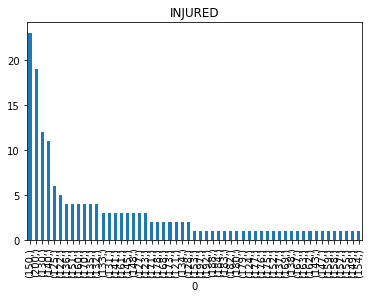

In [116]:
series_f.value_counts().plot(kind='bar')
plt.title('INJURED')

Text(0.5, 1.0, 'INJURED')

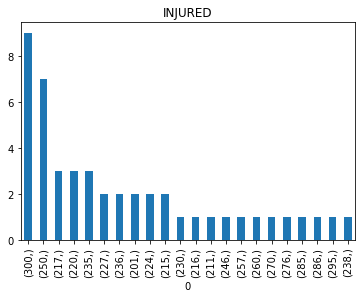

In [117]:
series_g.value_counts().plot(kind='bar')
plt.title('INJURED')

Text(0.5, 1.0, 'INJURED')

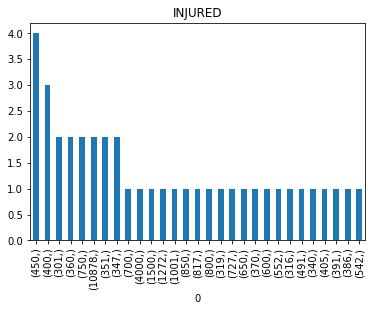

In [118]:
series_h.value_counts().plot(kind='bar')
plt.title('INJURED')

### Looking at the fatalities data distribution

In [119]:
df_check_fatalities = df.FATALITIES
df_check_fatalities

0         0
1         0
2         2
3         0
4         0
         ..
123687    0
123688    0
123689    0
123690    0
123691    0
Name: FATALITIES, Length: 123692, dtype: int64

In [120]:
df

,Unnamed: 0,GTD_ID,COUNTRY,CITY,FATALITIES,INJURED,TARGET_TYPE,ATTACK_TYPE,SUCCESSFUL_ATTACK,HOSTAGES,RANSOM,PROPERTY_DAMAGE,SUICIDE_ATTACK,PART_OF_MULTIPLE_INCIDENT,TYPE_OF_WEAPON_LIST,SUB_TYPE_OF_WEAPON,MONTH,YEAR
0,0,201912310033,32,11429,0,0,143,3,1,0,0,1,0,0,3,12,12,2019
1,1,201912310032,76,2512,0,1,379,2,1,0,0,0,0,0,1,10,12,2019
2,2,201912310031,166,8676,2,0,182,0,1,0,0,1,0,0,2,27,12,2019
3,4,201912310028,80,2501,0,0,379,2,1,0,0,1,0,0,1,26,12,2019
4,8,201912310024,136,11964,0,0,379,2,1,0,0,0,0,0,1,6,12,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123687,201173,197001030001,185,16952,0,0,143,3,1,0,0,1,0,0,3,5,1,1970
123688,201174,197001020003,185,16952,0,0,234,3,1,0,0,1,0,0,3,12,1,1970
123689,201175,197001020002,185,20601,0,0,545,2,1,0,0,1,0,0,1,26,1,1970
123690,201176,197001020001,186,18909,0,0,317,1,0,0,0,0,0,0,2,1,1,1970


In [121]:
fatalities_list=list(df_check_fatalities)

In [122]:
fatalities_list.sort()

In [123]:
list_a=[]
list_b=[]
list_c=[]
list_d=[]
list_e=[]
list_f=[]
list_g=[]
list_h=[]
for x in fatalities_list:
    if x<=15:
        list_a.append(x)
    elif x<=30:
        list_b.append(x)
    elif x<=50:
        list_c.append(x)
    elif x<=80:
        list_d.append(x)
    elif x<=120:
        list_e.append(x)
    elif x<=200:
        list_f.append(x)
    elif x<=300:
        list_g.append(x)
    elif x<=20000:
        list_h.append(x)
    

In [124]:
series_a= pd.DataFrame(list_a)
series_b= pd.DataFrame(list_b)
series_c= pd.DataFrame(list_c)
series_d= pd.DataFrame(list_d)
series_e= pd.DataFrame(list_e)
series_f= pd.DataFrame(list_f)
series_g= pd.DataFrame(list_g)
series_h= pd.DataFrame(list_h)

In [125]:
series_a

,0
0,0
1,0
2,0
3,0
4,0
...,...
120871,15
120872,15
120873,15
120874,15


Text(0.5, 1.0, 'FATALITIES')

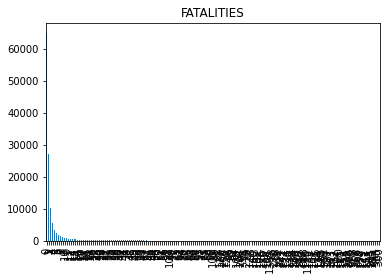

In [126]:
df_check_fatalities.value_counts().plot(kind='bar')
plt.title('FATALITIES')

Text(0.5, 1.0, 'FATALITIES')

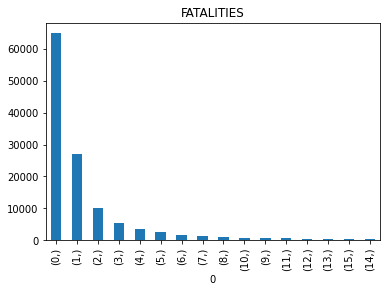

In [127]:
series_a.value_counts().plot(kind='bar')
plt.title('FATALITIES')

Text(0.5, 1.0, 'FATALITIES')

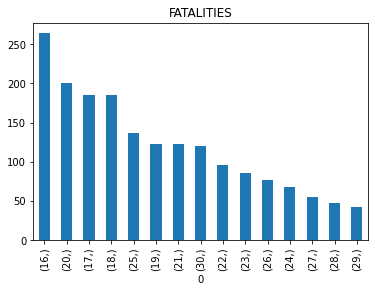

In [128]:
series_b.value_counts().plot(kind='bar')
plt.title('FATALITIES')

Text(0.5, 1.0, 'FATALITIES')

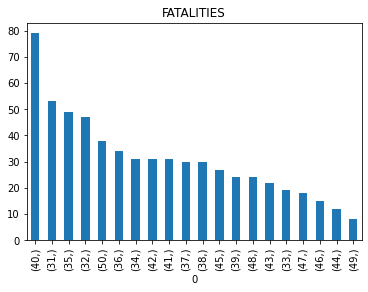

In [129]:
series_c.value_counts().plot(kind='bar')
plt.title('FATALITIES')

Text(0.5, 1.0, 'FATALITIES')

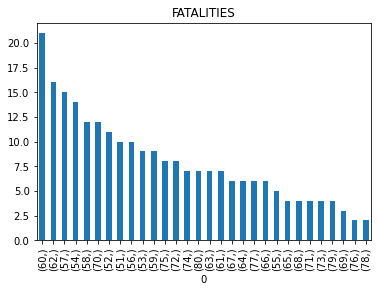

In [130]:
series_d.value_counts().plot(kind='bar')
plt.title('FATALITIES')

Text(0.5, 1.0, 'FATALITIES')

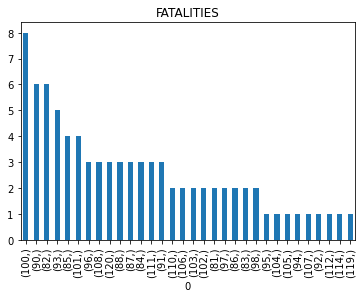

In [131]:
series_e.value_counts().plot(kind='bar')
plt.title('FATALITIES')

Text(0.5, 1.0, 'FATALITIES')

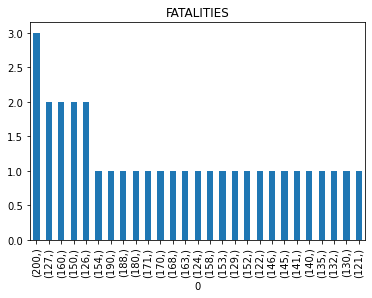

In [132]:
series_f.value_counts().plot(kind='bar')
plt.title('FATALITIES')

Text(0.5, 1.0, 'FATALITIES')

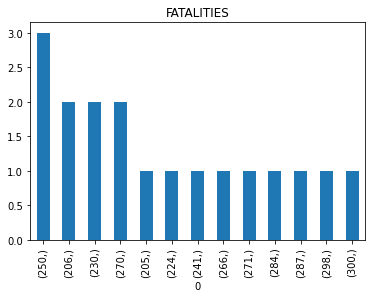

In [133]:
series_g.value_counts().plot(kind='bar')
plt.title('FATALITIES')

Text(0.5, 1.0, 'FATALITIES')

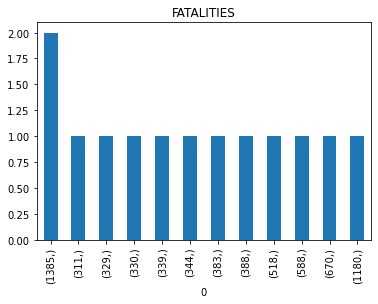

In [134]:
series_h.value_counts().plot(kind='bar')
plt.title('FATALITIES')